In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv('updated_dataset.csv')

In [18]:
df.head()

,COMPANY_NAME,CATEGORY1,COMPANY_URL,LON,LAT,ADDRESS_A_2,OrderPlaces,Place_ID,Place_Class,Place_Type,...,Place_Name,Road,Neighborhood,City,Province,Region,Postcode,Country,Country_Code,Geographical_Boundaries
0,Thuriah Medical Center مركز ذرية الطبي,Reproductive health clinic,http://www.thuriah.com.sa/,46.680585,24.675457,244 طريق مكة الفرعي، تقاطع طريق مكة مع,https://thuriah.com.sa/ar/reserve,42402451,highway,primary,...,مكة المكرمة,مكة المكرمة,NaN,NaN,محافظة الرياض,منطقة الرياض,12311,السعودية,sa,"['24.6752824', '24.6769224', '46.6789503', '46..."
1,مراكز الدكتور سمير عباس || Dr. Samir Abbas med...,Medical Center,NaN,46.697932,24.683484,طريق مكة الفرعي,NaN,41525269,highway,residential,...,الحيسية,الحيسية,السلامة,الرياض,محافظة الرياض,منطقة الرياض,12221,السعودية,sa,"['24.6835854', '24.6842648', '46.6977286', '46..."
2,مركز عالم ريتاج للسيدات,Women's health clinic,NaN,46.644746,24.725667,Al Mohammadiyyah,NaN,42329879,highway,residential,...,Zaid Bin Aslam,Zaid Bin Aslam,المحمدية,NaN,محافظة الرياض,منطقة الرياض,12364,السعودية,sa,"['24.7256422', '24.7274580', '46.6444139', '46..."
3,Farabi Dental Center,Dental clinic,NaN,46.577964,24.752673,Al Faisaliyah,https://farabiclinics.com/ar/book-appointment?...,42249548,highway,primary,...,طريق الملك عبدالعزيز,طريق الملك عبدالعزيز,NaN,NaN,محافظة الدرعية,منطقة الرياض,12572,السعودية,sa,"['24.7516026', '24.7536536', '46.5754958', '46..."
4,مجمع عيادات أم الحمام الطبي OMM AL HAMAM POLYC...,Medical clinic,https://wa.me/message/QYJNEPCPCTP7J1,46.640710,24.687271,Umm Al Hamam Al Gharbi,NaN,41729403,highway,tertiary,...,الأمير نواف بن عبدالعزيز,الأمير نواف بن عبدالعزيز,أم الحمام,NaN,محافظة الرياض,منطقة الرياض,12512,السعودية,sa,"['24.6863356', '24.6895506', '46.6364860', '46..."


In [78]:
df.columns

Index(['COMPANY_NAME', 'CATEGORY1', 'COMPANY_URL', 'LON', 'LAT', 'ADDRESS_A_2',
       'OrderPlaces', 'Place_ID', 'Place_Class', 'Place_Type', 'Place_Rank',
       'Importance', 'Address_Type', 'Place_Name', 'Road', 'Neighborhood',
       'City', 'Province', 'Region', 'Postcode', 'Country', 'Country_Code',
       'Geographical_Boundaries', 'General_Category'],
      dtype='object')

In [20]:
df.isna().sum()

COMPANY_NAME                0
CATEGORY1                   0
COMPANY_URL                41
LON                         0
LAT                         0
ADDRESS_A_2                 1
OrderPlaces                71
Place_ID                    0
Place_Class                 0
Place_Type                  0
Place_Rank                  0
Importance                  0
Address_Type                0
Place_Name                 15
Road                       13
Neighborhood               23
City                       65
Province                    0
Region                      0
Postcode                    0
Country                     0
Country_Code                0
Geographical_Boundaries     0
dtype: int64

## handLing missing values :

In [23]:
df['COMPANY_URL'].fillna("Not Provided", inplace=True)
df['OrderPlaces'].fillna("Not Provided", inplace=True)
df['Neighborhood'].fillna("Not Provided", inplace=True)

In [25]:
df['Place_Name'].fillna(df['Road'], inplace=True)

df['Road'].fillna(df['Place_Name'], inplace=True)

df['City'].fillna(df['Region'], inplace=True)

In [32]:
df['ADDRESS_A_2'].fillna(
    df['Country'] + ', ' + df['Region'] + ', ' + df['City'], 
    inplace=True
)

In [35]:
df['Place_Name'].fillna("Unknown", inplace=True)
df['Road'].fillna("Unknown", inplace=True)

In [77]:
df.isna().sum()

COMPANY_NAME               0
CATEGORY1                  0
COMPANY_URL                0
LON                        0
LAT                        0
ADDRESS_A_2                0
OrderPlaces                0
Place_ID                   0
Place_Class                0
Place_Type                 0
Place_Rank                 0
Importance                 0
Address_Type               0
Place_Name                 0
Road                       0
Neighborhood               0
City                       0
Province                   0
Region                     0
Postcode                   0
Country                    0
Country_Code               0
Geographical_Boundaries    0
General_Category           0
dtype: int64

## Preprocessing :

In [60]:
df['City'].value_counts()

City
منطقة الرياض    65
الرياض          33
جدة              1
Name: count, dtype: int64

In [62]:
df['City'] = df['City'].replace("منطقة الرياض", "الرياض")


In [63]:
df['City'].value_counts()

City
الرياض    98
جدة        1
Name: count, dtype: int64

In [75]:
# create new column :


category_to_general = {
    'Healthcare': [
        'Medical clinic', 'Hospital', 'Women\'s health clinic', 'Medical Center', 'Optician', 'Dental clinic',
        'Walk-in clinic', 'Skin care clinic', 'Private hospital', 'Public medical center',
        'Maternity hospital', 'Fertility clinic', 'Physical therapy clinic', 'Reproductive health clinic', 
        'Plastic surgery clinic', 'Alternative medicine practitioner', 'Rehabilitation center', 'Physical therapist'
    ],
    'Fitness&Wellness': ['Gym', 'Fitness center'],
    'Retail': ['Women\'s clothing store', 'Clothing store', 'Hypermarket', 'Pharmacy', 'Tailor', 'Beauty salon', 'Dressmaker'],
    'Accommodation': ['Hotel', 'Hostel', 'Working women\'s hostel'],
    'Government&Services': ['Postal code', 'Government office', 'Charity'],
    'Education': ['Religious school']
}

# Function to map specific categories to general categories
def map_general_category(category):
    for general_category, specifics in category_to_general.items():
        if category in specifics:
            return general_category
    return 'Other'  # Default to 'Other' if category doesn't match

# Apply the function to create the new 'General_Category' column
df['General_Category'] = df['CATEGORY1'].apply(map_general_category)



In [76]:
df.head()

,COMPANY_NAME,CATEGORY1,COMPANY_URL,LON,LAT,ADDRESS_A_2,OrderPlaces,Place_ID,Place_Class,Place_Type,...,Road,Neighborhood,City,Province,Region,Postcode,Country,Country_Code,Geographical_Boundaries,General_Category
0,Thuriah Medical Center مركز ذرية الطبي,Reproductive health clinic,http://www.thuriah.com.sa/,46.680585,24.675457,244 طريق مكة الفرعي، تقاطع طريق مكة مع,https://thuriah.com.sa/ar/reserve,42402451,highway,primary,...,مكة المكرمة,Not Provided,الرياض,محافظة الرياض,منطقة الرياض,12311,السعودية,sa,"['24.6752824', '24.6769224', '46.6789503', '46...",Healthcare
1,مراكز الدكتور سمير عباس || Dr. Samir Abbas med...,Medical Center,Not Provided,46.697932,24.683484,طريق مكة الفرعي,Not Provided,41525269,highway,residential,...,الحيسية,السلامة,الرياض,محافظة الرياض,منطقة الرياض,12221,السعودية,sa,"['24.6835854', '24.6842648', '46.6977286', '46...",Healthcare
2,مركز عالم ريتاج للسيدات,Women's health clinic,Not Provided,46.644746,24.725667,Al Mohammadiyyah,Not Provided,42329879,highway,residential,...,Zaid Bin Aslam,المحمدية,الرياض,محافظة الرياض,منطقة الرياض,12364,السعودية,sa,"['24.7256422', '24.7274580', '46.6444139', '46...",Healthcare
3,Farabi Dental Center,Dental clinic,Not Provided,46.577964,24.752673,Al Faisaliyah,https://farabiclinics.com/ar/book-appointment?...,42249548,highway,primary,...,طريق الملك عبدالعزيز,Not Provided,الرياض,محافظة الدرعية,منطقة الرياض,12572,السعودية,sa,"['24.7516026', '24.7536536', '46.5754958', '46...",Healthcare
4,مجمع عيادات أم الحمام الطبي OMM AL HAMAM POLYC...,Medical clinic,https://wa.me/message/QYJNEPCPCTP7J1,46.640710,24.687271,Umm Al Hamam Al Gharbi,Not Provided,41729403,highway,tertiary,...,الأمير نواف بن عبدالعزيز,أم الحمام,الرياض,محافظة الرياض,منطقة الرياض,12512,السعودية,sa,"['24.6863356', '24.6895506', '46.6364860', '46...",Healthcare


## Visualization

In [79]:
!pip install folium

   ---------------------------------------- 0.0/108.9 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.9 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.9 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.9 kB ? eta -:--:--
   ----------- --------------------------- 30.7/108.9 kB 217.9 kB/s eta 0:00:01
   ---------------------- ---------------- 61.4/108.9 kB 297.7 kB/s eta 0:00:01
   --------------------------------- ----- 92.2/108.9 kB 348.6 kB/s eta 0:00:01
   -------------------------------------- 108.9/108.9 kB 370.9 kB/s eta 0:00:00


In [80]:
import folium

# Create a base map centered around Saudi Arabia
m = folium.Map(location=[23.8859, 45.0792], zoom_start=6)

# Loop through the dataset to plot business locations
for idx, row in df.iterrows():
    folium.Marker(
        location=[row['LAT'], row['LON']],
        popup=f"Company: {row['COMPANY_NAME']}<br>Category: {row['CATEGORY1']}",
        icon=folium.Icon(color='blue')
    ).add_to(m)

# Save the map as an HTML file
m.save('business_map.html')


In [86]:
from IPython.display import IFrame
IFrame('business_map.html', width=800, height=600)

In [81]:
from folium.plugins import MarkerCluster

# Create the map
m = folium.Map(location=[23.8859, 45.0792], zoom_start=6)

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(m)

# Loop through the dataset and add markers to the cluster
for idx, row in df.iterrows():
    folium.Marker(
        location=[row['LAT'], row['LON']],
        popup=f"Company: {row['COMPANY_NAME']}<br>Category: {row['CATEGORY1']}",
        icon=folium.Icon(color='blue')
    ).add_to(marker_cluster)

# Save the map as an HTML file
m.save('clustered_business_map.html')

In [87]:
IFrame('clustered_business_map.html', width=800, height=600)

In [82]:
!pip install geopandas


   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   ---- ---------------------------------- 41.0/323.6 kB 991.0 kB/s eta 0:00:01
   ---- ---------------------------------- 41.0/323.6 kB 991.0 kB/s eta 0:00:01
   --------- ----------------------------- 81.9/323.6 kB 573.4 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/323.6 kB 585.1 kB/s eta 0:00:01
   ------------- ------------------------ 112.6/323.6 kB 547.6 kB/s eta 0:00:01
   -------------- ----------------------- 122.9/323.6 kB 425.1 kB/s eta 0:00:01
   ------------------------ ------------- 204.8/323.6 kB 623.6 kB/s eta 0:00:01
   ---------------------------- --------- 245.8/323.6 kB 684.7 kB/s eta 0:00:01
   ------------------------------ ------- 256.0/323.6 kB 605.3 kB/s eta 0:00:01
   ------------------------------------ - 307.2/323.6 kB 655.5 kB/s eta 0:00:01
   -------------------------------------- 323.6/323.6 kB 668.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1

In [90]:

# Create a base Folium map centered around Saudi Arabia
m = folium.Map(location=[23.8859, 45.0792], zoom_start=6)

# Create a marker cluster to handle multiple markers more effectively
marker_cluster = MarkerCluster().add_to(m)

# Iterate over the rows of the dataset and add markers to the map
for idx, row in df.iterrows():
    # Choose marker color based on the business category
    color = 'red' if row['General_Category'] == 'Healthcare' else 'green'  # Example for categories
    
    # Add a marker to the map with popup information
    folium.Marker(
        location=[row['LAT'], row['LON']],
        popup=f"Company: {row['COMPANY_NAME']}<br>Category: {row['CATEGORY1']}",
        icon=folium.Icon(color=color)
    ).add_to(marker_cluster)

# Save the map as an HTML file
m.save('clustered_business_map_1.html')


In [91]:
IFrame('clustered_business_map_1.html', width=800, height=600)

In [92]:
category_rank_analysis = df.groupby('General_Category')['Place_Rank'].mean().sort_values()

print(category_rank_analysis)


General_Category
Education              26.000000
Retail                 26.500000
Healthcare             26.802817
Fitness&Wellness       27.090909
Government&Services    27.333333
Accommodation          27.600000
Name: Place_Rank, dtype: float64


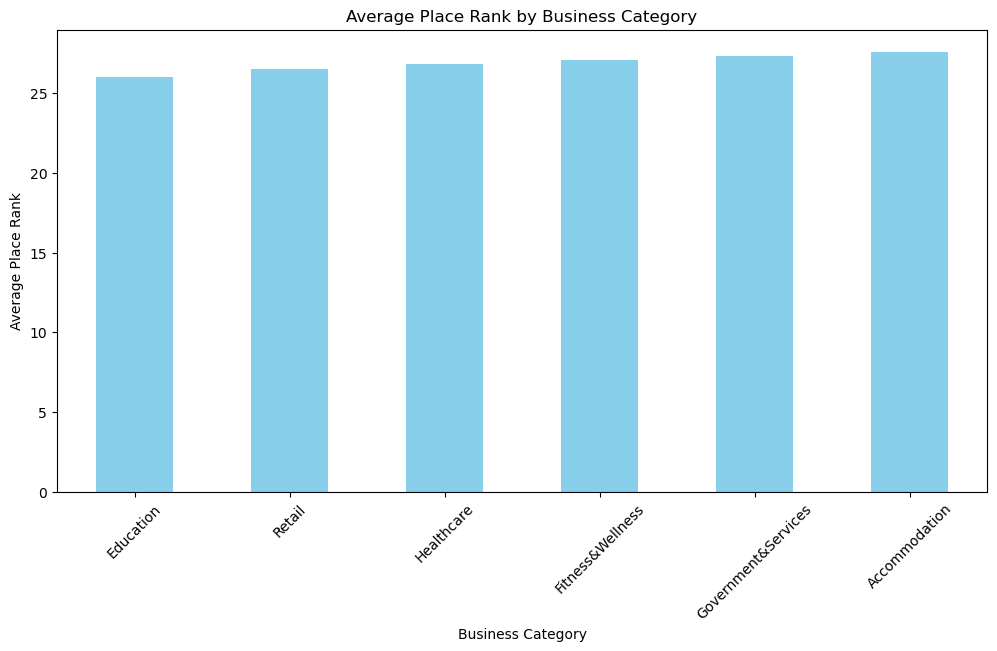

In [93]:
import matplotlib.pyplot as plt

# Plot the average Place_Rank for each category
category_rank_analysis.plot(kind='bar', color='skyblue', figsize=(12, 6))
plt.title('Average Place Rank by Business Category')
plt.xlabel('Business Category')
plt.ylabel('Average Place Rank')
plt.xticks(rotation=45)
plt.show()


In [96]:

# Count the occurrences of each category in General_Category
category_counts = df['General_Category'].value_counts()

# Display the category distribution
print(category_counts)


General_Category
Healthcare             71
Fitness&Wellness       11
Retail                  8
Accommodation           5
Government&Services     3
Education               1
Name: count, dtype: int64


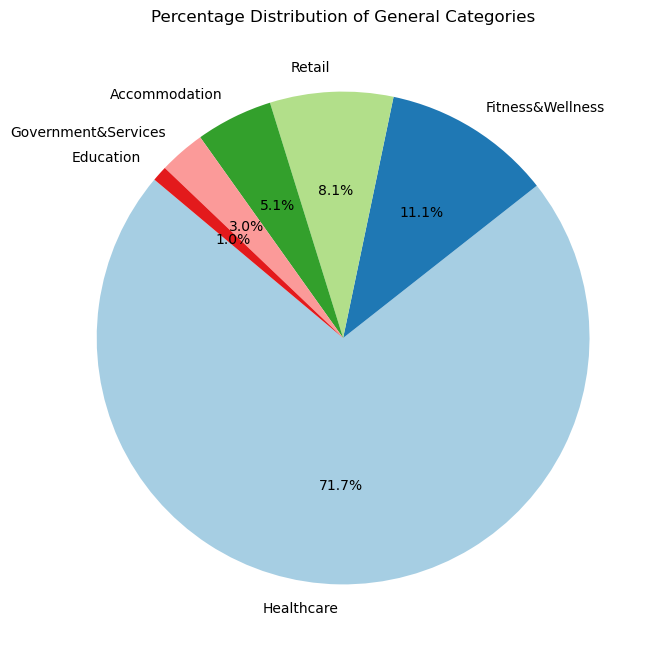

In [97]:
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.title('Percentage Distribution of General Categories')
plt.show()


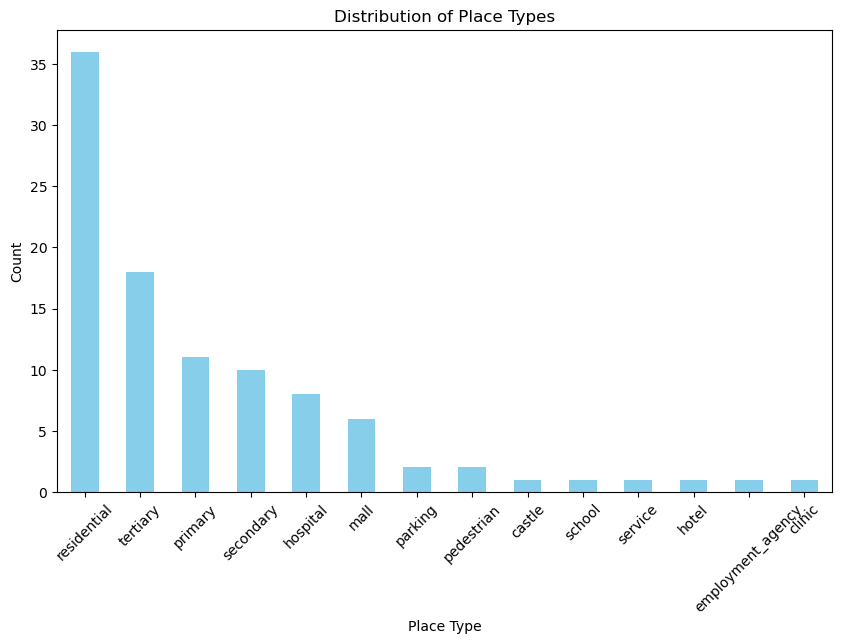

In [98]:
place_type_counts = df['Place_Type'].value_counts()

plt.figure(figsize=(10, 6))
place_type_counts.plot(kind='bar', color='skyblue')

plt.title('Distribution of Place Types')
plt.xlabel('Place Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



In [100]:

address_category_counts = df.groupby(['Address_Type', 'General_Category']).size().unstack(fill_value=0)

print(address_category_counts)


General_Category  Accommodation  Education  Fitness&Wellness  \
Address_Type                                                   
amenity                       1          0                 1   
historic                      0          0                 0   
office                        0          0                 0   
road                          3          1                 8   
shop                          0          0                 2   
tourism                       1          0                 0   

General_Category  Government&Services  Healthcare  Retail  
Address_Type                                               
amenity                             1           9       0  
historic                            0           1       0  
office                              0           1       0  
road                                2          57       7  
shop                                0           3       1  
tourism                             0           0       0  


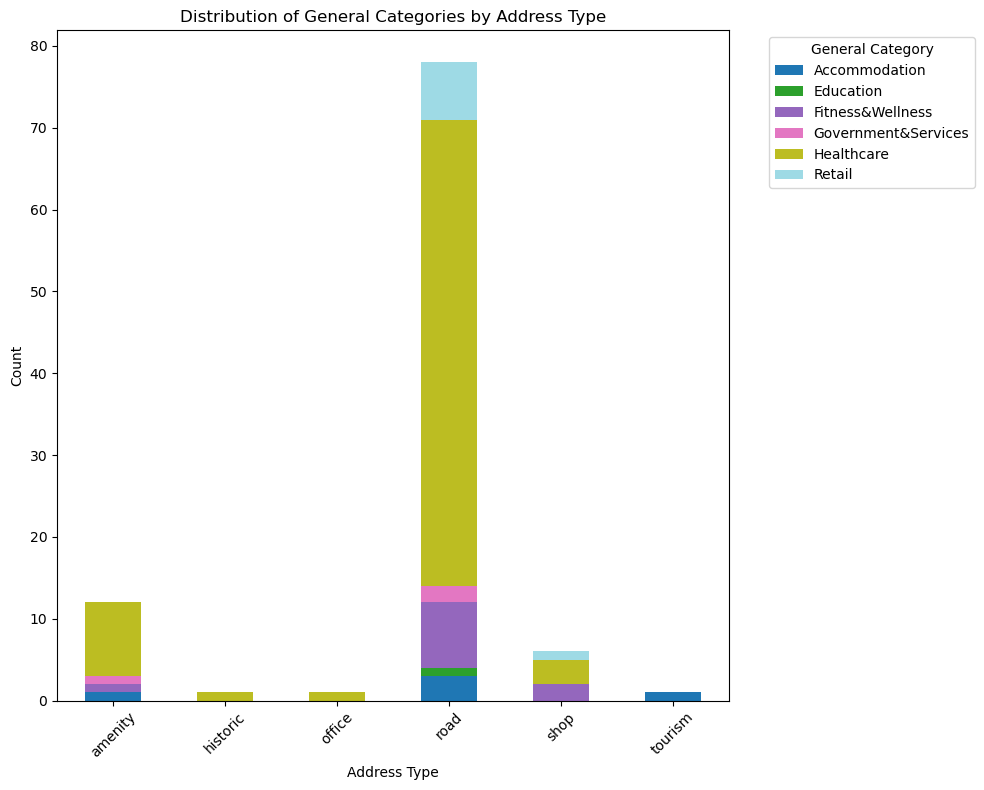

In [102]:
# Plot the stacked bar chart
address_category_counts.plot(kind='bar', stacked=True, figsize=(10, 8), colormap='tab20')

# Add titles and labels
plt.title('Distribution of General Categories by Address Type')
plt.xlabel('Address Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='General Category', bbox_to_anchor=(1.05, 1), loc='upper left')  # Position legend outside the chart
plt.tight_layout()  # Adjust layout to fit everything

plt.show()
